# Car Insurance Claim Prediction  
### Data load  
Import needed libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

Load the dataset


In [2]:
filename="Car_Insurance_Claim.csv" 
path=os.path.join(os.getcwd(),filename) #set the path
df=pd.read_csv(path) #read the csv file


# Data Exploration  
Check the structure of the dataset

In [17]:
df.head() #show the first 5 rows

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [20]:
df.info(verbose=True) #show the information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

There are 11 numerical variables and 8 categorical variables in the dataset


In [21]:
df.describe().T #show the features of numerical columns 
#for a representation of the main statistical parameters of numerical variables

,count,mean,std,min,25%,50%,75%,max
ID,10000.0,500521.906800,290030.768758,101.000000,249638.500000,501777.000000,753974.500000,999976.000000
CREDIT_SCORE,9018.0,0.515813,0.137688,0.053358,0.417191,0.525033,0.618312,0.960819
VEHICLE_OWNERSHIP,10000.0,0.697000,0.459578,0.000000,0.000000,1.000000,1.000000,1.000000
MARRIED,10000.0,0.498200,0.500022,0.000000,0.000000,0.000000,1.000000,1.000000
CHILDREN,10000.0,0.688800,0.463008,0.000000,0.000000,1.000000,1.000000,1.000000
POSTAL_CODE,10000.0,19864.548400,18915.613855,10238.000000,10238.000000,10238.000000,32765.000000,92101.000000
ANNUAL_MILEAGE,9043.0,11697.003207,2818.434528,2000.000000,10000.000000,12000.000000,14000.000000,22000.000000
SPEEDING_VIOLATIONS,10000.0,1.482900,2.241966,0.000000,0.000000,0.000000,2.000000,22.000000
DUIS,10000.0,0.239200,0.554990,0.000000,0.000000,0.000000,0.000000,6.000000
PAST_ACCIDENTS,10000.0,1.056300,1.652454,0.000000,0.000000,0.000000,2.000000,15.000000


In [3]:
na = df.isnull().sum() # Count the number of missing values in each column
print(f"Missing Values Summary: \n{na}")

# Credit Score and Annual Mileage have 982 and 957 missing values respectively. The rest are "complete"

Missing Values Summary: 
ID                       0
AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64


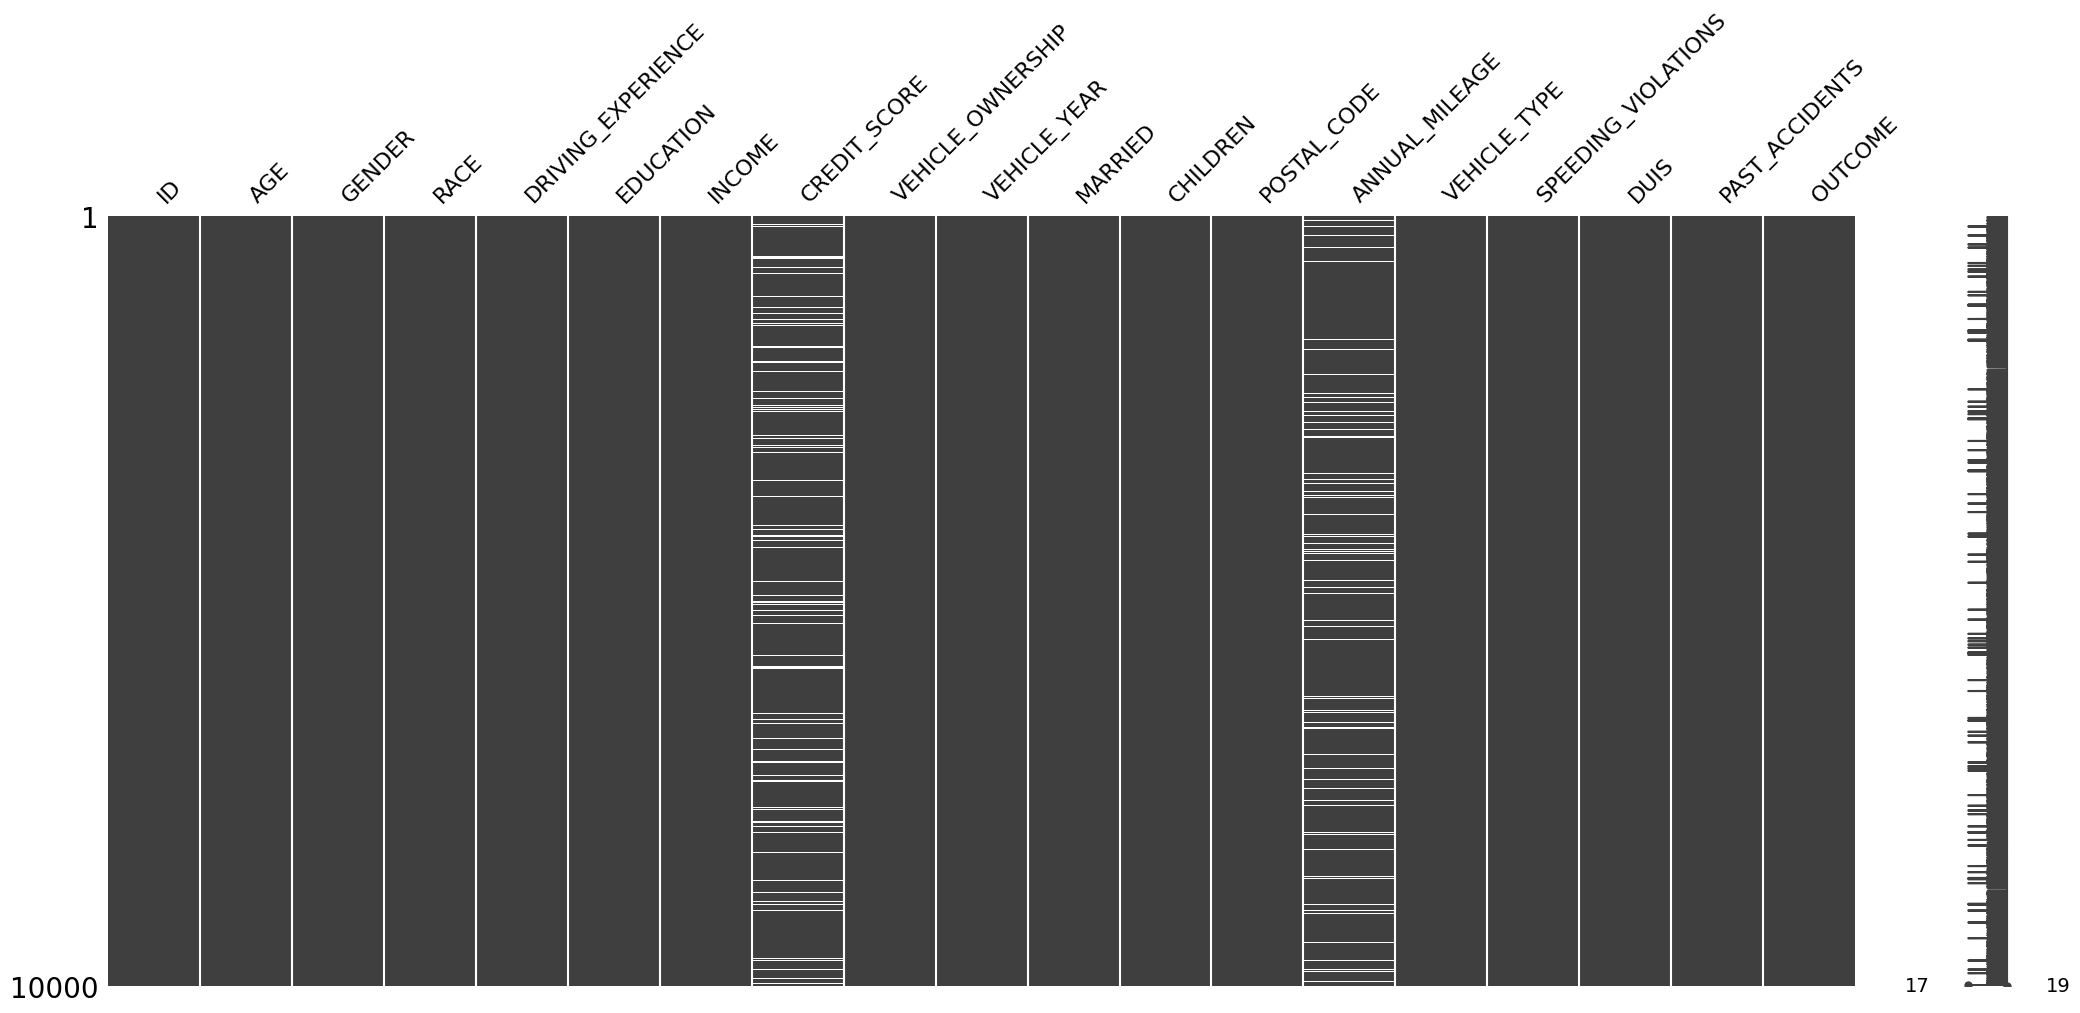

In [4]:
import missingno as msno 
p=msno.matrix(df) # Show a matrix of missing values

In [23]:
df.duplicated().sum() # Count the number of duplicated rows
# There are no duplicated rows

0

In [24]:
df.nunique() # Count the number of unique values in each column
# every variable shows at least 2 different values


ID                     10000
AGE                        4
GENDER                     2
RACE                       2
DRIVING_EXPERIENCE         4
EDUCATION                  3
INCOME                     4
CREDIT_SCORE            9018
VEHICLE_OWNERSHIP          2
VEHICLE_YEAR               2
MARRIED                    2
CHILDREN                   2
POSTAL_CODE                4
ANNUAL_MILEAGE            21
VEHICLE_TYPE               2
SPEEDING_VIOLATIONS       21
DUIS                       7
PAST_ACCIDENTS            15
OUTCOME                    2
dtype: int64

### Variables distribution

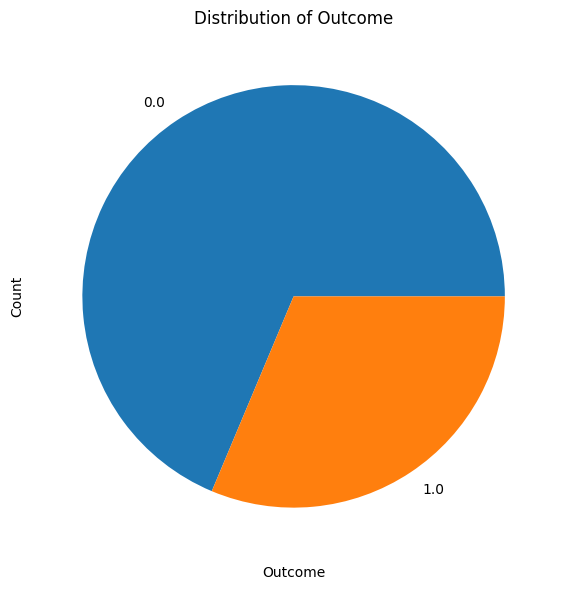

In [5]:
#OUTCOME
plt.figure(figsize=(10, 6)) # Create a new figure
fig = df["OUTCOME"].value_counts().plot(kind="pie") # Plot a pie chart
fig.set_xlabel("Outcome") # Set the x-axis label
fig.set_ylabel("Count") # Set the y-axis label
fig.set_title("Distribution of Outcome") # Set the title
plt.tight_layout() # Adjust the layout
plt.show() # Display the plot

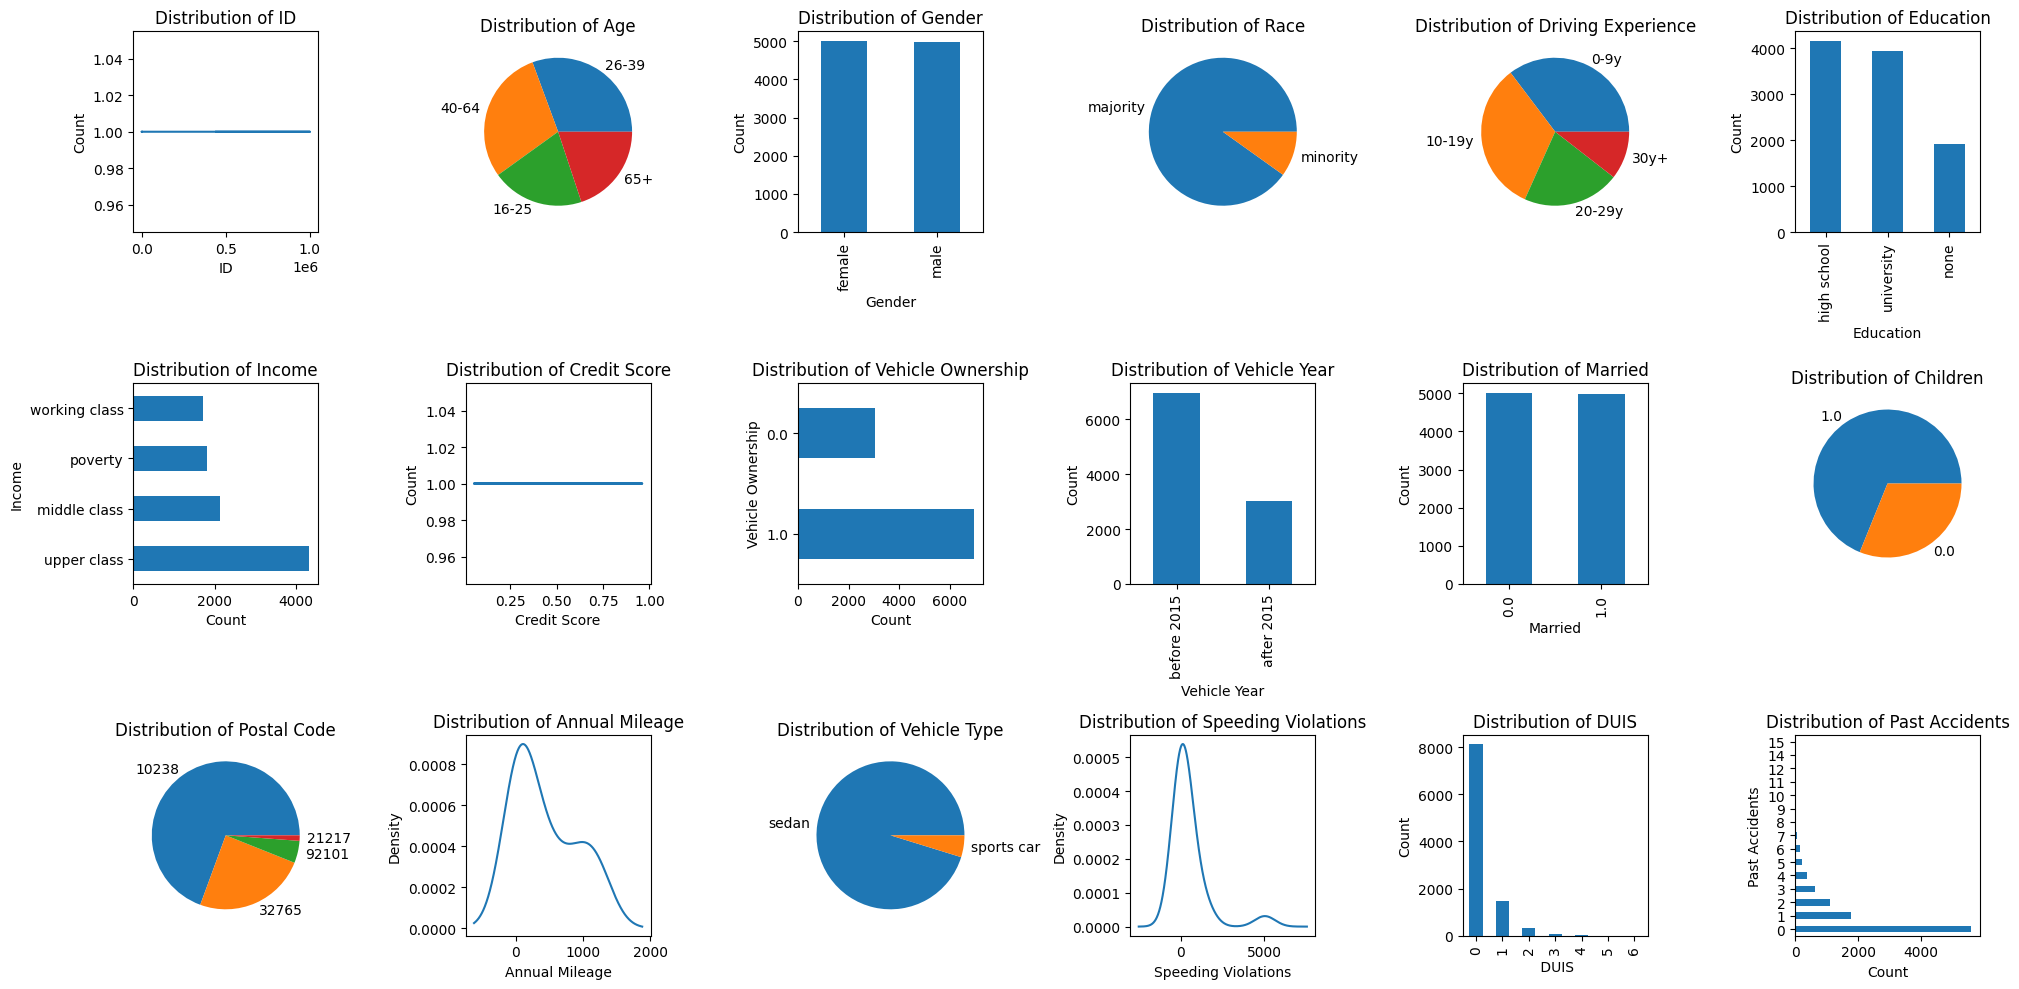

In [26]:
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(20, 10)) # Create a new figure with 3 rows and 6 columns
#ID
df["ID"].value_counts().plot(kind="line", ax=axes[0, 0]) # Plot a line chart
axes[0, 0].set_xlabel("ID") # Set the x-axis label
axes[0, 0].set_ylabel("Count") # Set the y-axis label
axes[0, 0].set_title("Distribution of ID") # Set the title
#ID has 10000 different values

#AGE
df["AGE"].value_counts().plot(kind="pie", ax=axes[0,1])
axes[0,1].set_ylabel("") #for pie charts, we setted the y-axis label to an empty string to avoid visual clutter in the graph
axes[0,1].set_title("Distribution of Age")

#GENDER
df["GENDER"].value_counts().plot(kind="bar", ax=axes[0,2])
axes[0,2].set_xlabel("Gender")
axes[0,2].set_ylabel("Count")
axes[0,2].set_title("Distribution of Gender")

#RACE
df["RACE"].value_counts().plot(kind="pie", ax=axes[0,3])
axes[0,3].set_ylabel("")
axes[0,3].set_title("Distribution of Race")

#DRIVING EXPERIENCE
df["DRIVING_EXPERIENCE"].value_counts().plot(kind="pie", ax=axes[0,4])
axes[0,4].set_ylabel("")
axes[0,4].set_title("Distribution of Driving Experience")

#EDUCATION
df["EDUCATION"].value_counts().plot(kind="bar", ax=axes[0,5])
axes[0,5].set_xlabel("Education")
axes[0,5].set_ylabel("Count")
axes[0,5].set_title("Distribution of Education")

#INCOME
df["INCOME"].value_counts().plot(kind="barh", ax=axes[1,0])
axes[1,0].set_xlabel("Count")
axes[1,0].set_ylabel("Income")
axes[1,0].set_title("Distribution of Income")

#CREDIT SCORE
df["CREDIT_SCORE"].value_counts().plot(kind="line", ax=axes[1,1])
axes[1,1].set_xlabel("Credit Score")
axes[1,1].set_ylabel("Count")
axes[1,1].set_title("Distribution of Credit Score")

#VEHICLE OWNERSHIP
df["VEHICLE_OWNERSHIP"].value_counts().plot(kind="barh", ax=axes[1,2])
axes[1,2].set_xlabel("Count")
axes[1,2].set_ylabel("Vehicle Ownership")
axes[1,2].set_title("Distribution of Vehicle Ownership")

#VEHICLE YEAR
df["VEHICLE_YEAR"].value_counts().plot(kind="bar", ax=axes[1,3])
axes[1,3].set_xlabel("Vehicle Year")
axes[1,3].set_ylabel("Count")
axes[1,3].set_title("Distribution of Vehicle Year")

df["MARRIED"].value_counts().plot(kind="bar", ax=axes[1,4])
axes[1,4].set_xlabel("Married")
axes[1,4].set_ylabel("Count")
axes[1,4].set_title("Distribution of Married")

#CHILDREN
df["CHILDREN"].value_counts().plot(kind="pie", ax=axes[1,5])
axes[1,5].set_ylabel("")
axes[1,5].set_title("Distribution of Children")

#POSTAL CODE
df["POSTAL_CODE"].value_counts().plot(kind="pie", ax=axes[2,0])
axes[2,0].set_ylabel("")
axes[2,0].set_title("Distribution of Postal Code")

#ANNUAL MILEAGE
df["ANNUAL_MILEAGE"].value_counts().plot(kind="density", ax=axes[2,1])
axes[2,1].set_xlabel("Annual Mileage")
axes[2,1].set_ylabel("Density")
axes[2,1].set_title("Distribution of Annual Mileage")

#VEHICLE TYPE
df["VEHICLE_TYPE"].value_counts().plot(kind="pie", ax=axes[2,2])
axes[2,2].set_ylabel("")
axes[2,2].set_title("Distribution of Vehicle Type")

#SPEEDING VIOLATIONS
df["SPEEDING_VIOLATIONS"].value_counts().plot(kind="density", ax=axes[2,3])
axes[2,3].set_xlabel("Speeding Violations")
axes[2,3].set_ylabel("Density")
axes[2,3].set_title("Distribution of Speeding Violations")

#DUIS
df["DUIS"].value_counts().plot(kind="bar", ax=axes[2,4])
axes[2,4].set_xlabel(" DUIS")
axes[2,4].set_ylabel("Count")
axes[2,4].set_title("Distribution of DUIS")

#PAST ACCIDENTS
df["PAST_ACCIDENTS"].value_counts().plot(kind="barh", ax=axes[2,5])
axes[2,5].set_xlabel("Count")
axes[2,5].set_ylabel("Past Accidents")
axes[2,5].set_title("Distribution of Past Accidents")

plt.tight_layout()
plt.show()

### Potential relationships identification

/var/folders/85/6zr236cn33l8cwfy85h5hzm40000gn/T/ipykernel_6553/659554405.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


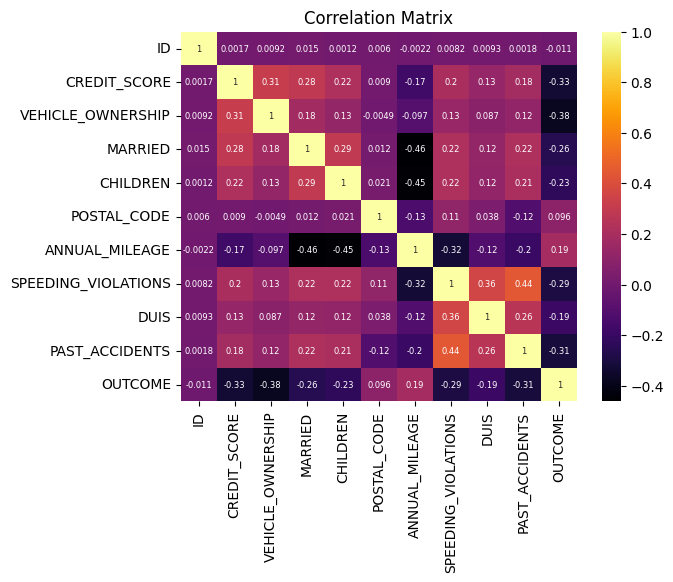

In [11]:
# Correlation Matrix
fig, ax = plt.subplots() 
correlation_matrix = df.corr(numeric_only=True) # Compute the correlation matrix
ax = sns.heatmap(correlation_matrix, cmap="inferno", annot=True, annot_kws={"size": 6}) # Create a heatmap using the correlation matrix 
ax.set_title('Correlation Matrix')
fig.show()

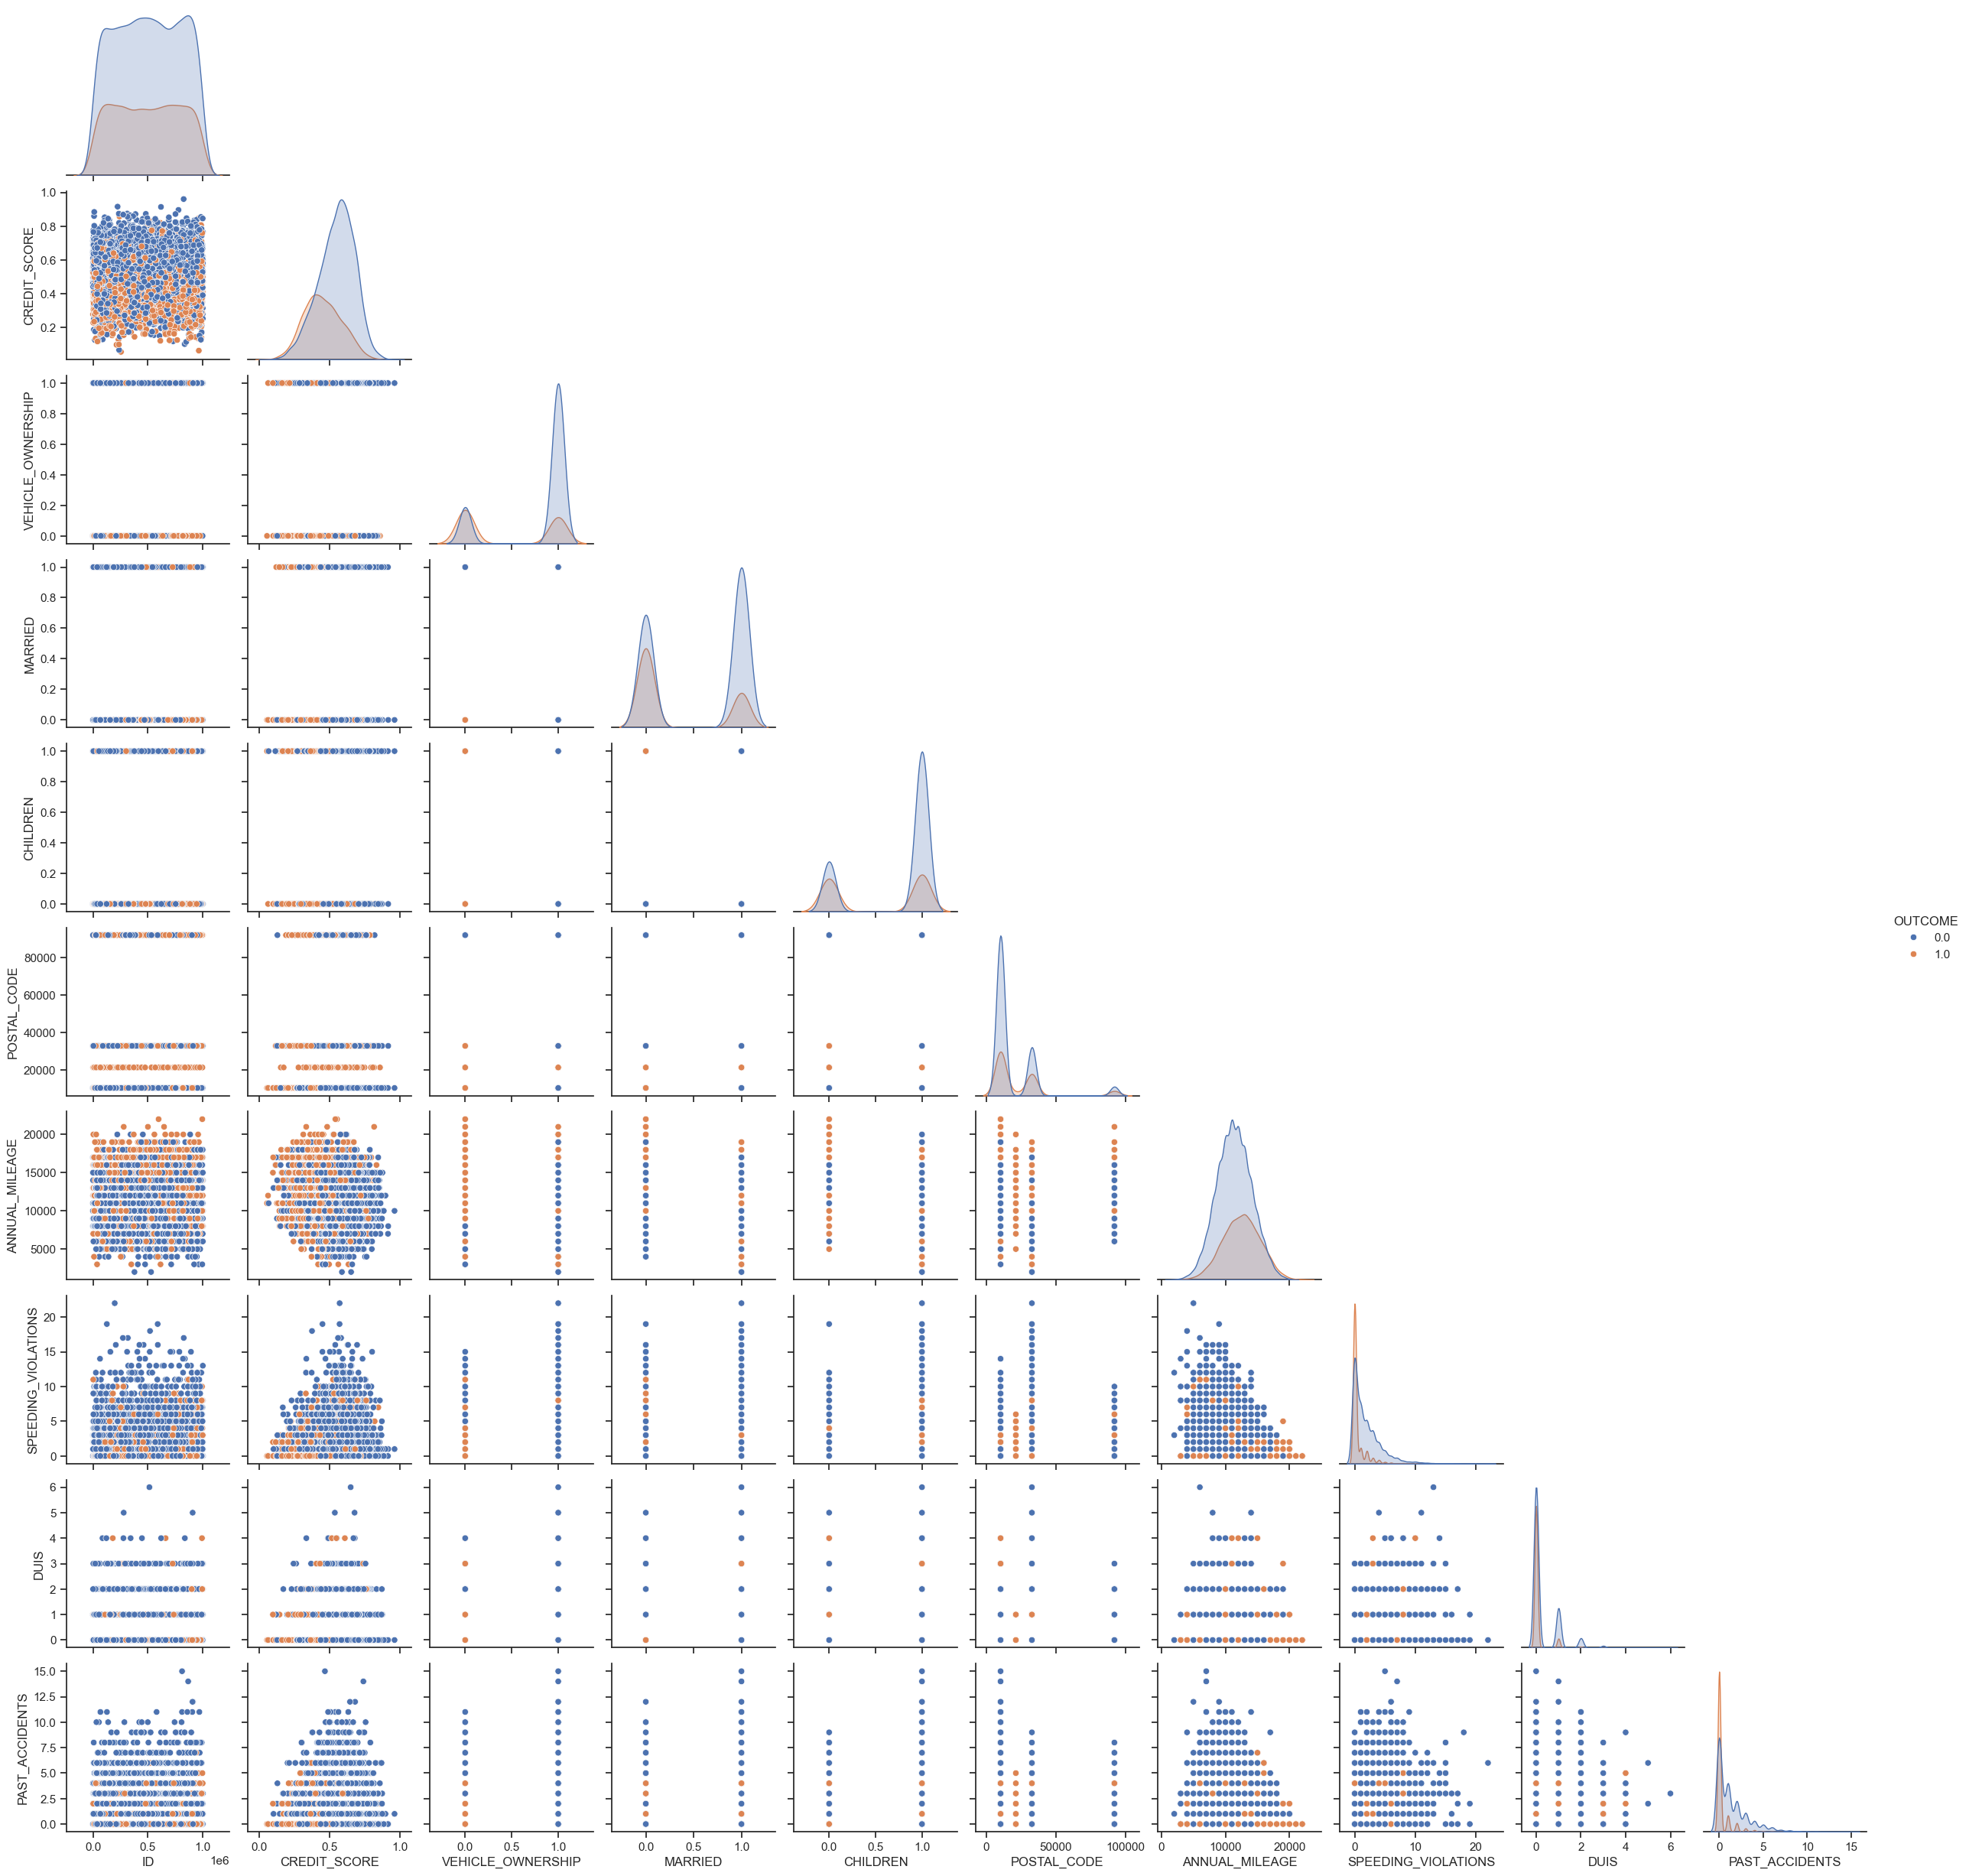

In [28]:
sns.set(style="ticks") # Set the style of the plot
sns.pairplot(df, hue='OUTCOME', corner=True) # Create a pairplot of the dataset

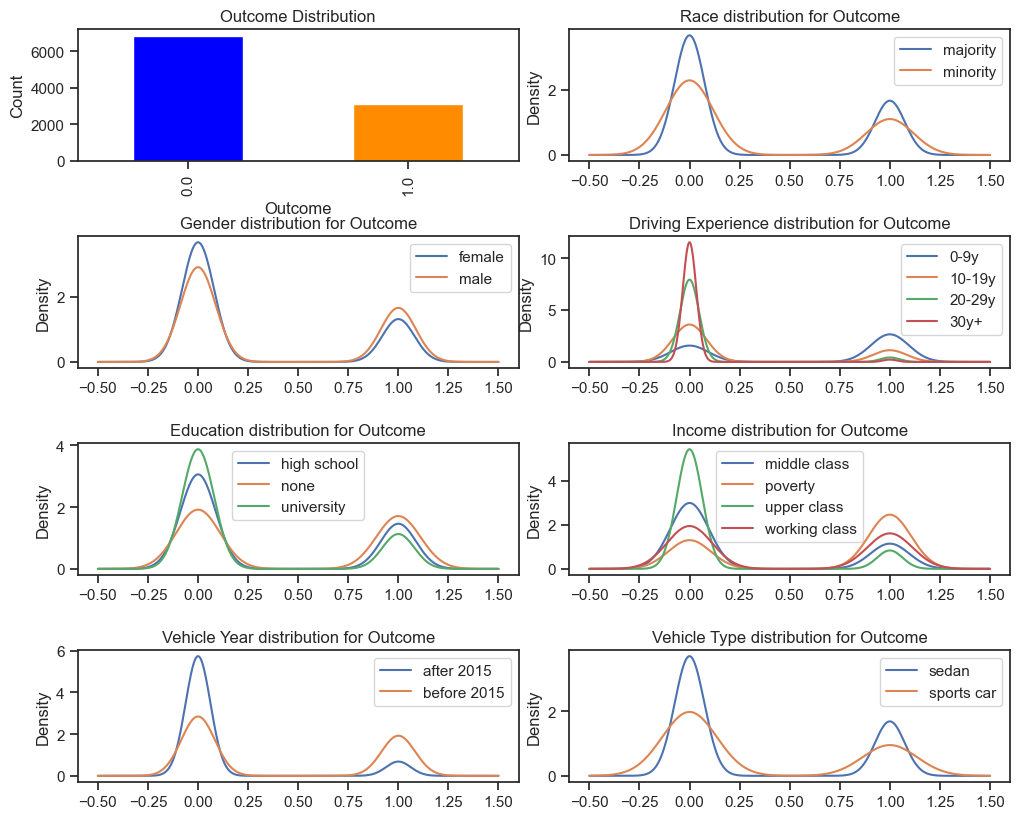

In [29]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 10)) # Create a 4x2 grid of subplots
df["OUTCOME"].value_counts().plot(kind="bar", color=["blue", "darkorange"], ax=axes[0, 0], title="Outcome Distribution", xlabel="Outcome", ylabel="Count") # Outcome distribution reminder
df.groupby("RACE")["OUTCOME"].plot(kind="density", legend=True, figsize=(10, 8), ax=axes[0, 1], title="Race distribution for Outcome") # Race distribution for Outcome
df.groupby("GENDER")["OUTCOME"].plot(kind="density", legend=True, figsize=(10, 8), ax=axes[1, 0], title="Gender distribution for Outcome") # Gender distribution for Outcome
df.groupby("DRIVING_EXPERIENCE")["OUTCOME"].plot(kind="density", legend=True, figsize=(10, 8), ax=axes[1, 1], title="Driving Experience distribution for Outcome") # Driving Experience distribution for Outcome
df.groupby("EDUCATION")["OUTCOME"].plot(kind="density", legend=True, figsize=(10, 8), ax=axes[2, 0], title="Education distribution for Outcome") # Education distribution for Outcome
df.groupby("INCOME")["OUTCOME"].plot(kind="density", legend=True, figsize=(10, 8), ax=axes[2, 1], title="Income distribution for Outcome") # Income distribution for Outcome
df.groupby("VEHICLE_YEAR")["OUTCOME"].plot(kind="density", legend=True, figsize=(10, 8), ax=axes[3, 0], title="Vehicle Year distribution for Outcome") # Vehicle Year distribution for Outcome
df.groupby("VEHICLE_TYPE")["OUTCOME"].plot(kind="density", legend=True, figsize=(10, 8), ax=axes[3, 1], title="Vehicle Type distribution for Outcome") # Vehicle Type distribution for Outcome
plt.tight_layout(pad=0) # Adjust the spacing between subplots.

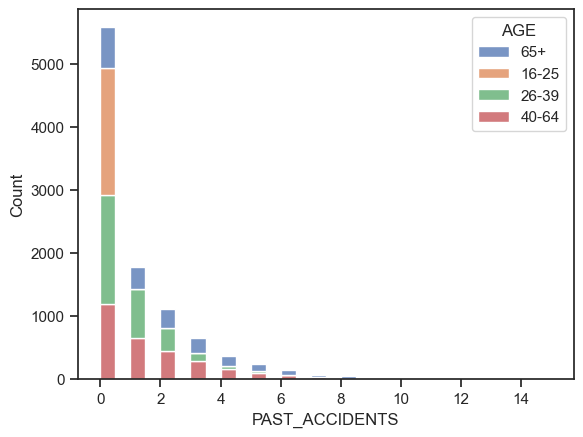

In [30]:
sns.histplot(df, x="PAST_ACCIDENTS", hue="AGE", multiple="stack", bins=30) # Plot the histogram of PAST_ACCIDENTS by AGE 
plt.show()
#It seems that the 16-25 age group doesn't cause accidents

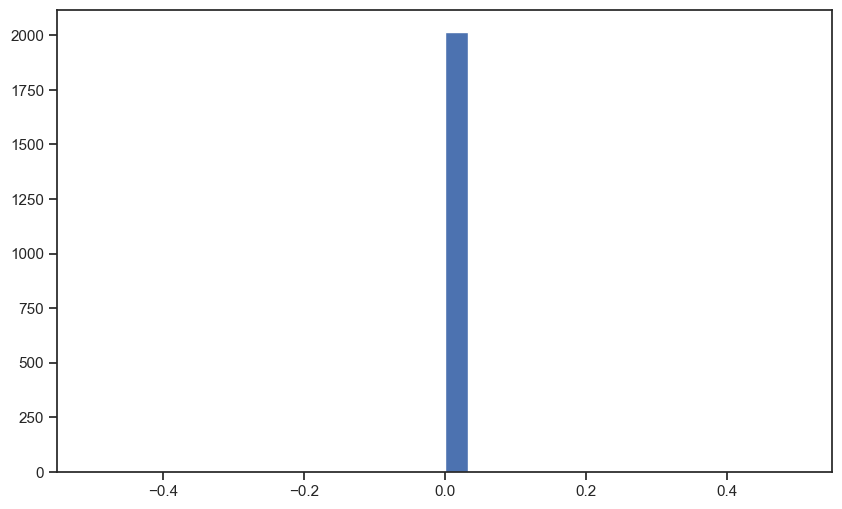

In [31]:
#Let's verify that the 16-25 age group is not causing accidents
df_age_16_25 = df[df["AGE"] == "16-25"] # Filter the dataset for the 16-25 age group
plt.figure(figsize=(10, 6)) 
plt.hist(df_age_16_25["PAST_ACCIDENTS"], bins=30)
plt.show()

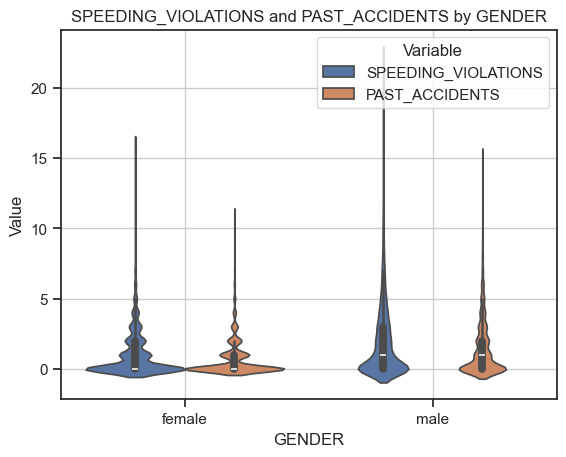

In [32]:
df2= pd.melt(df, id_vars=['GENDER'], value_vars=['SPEEDING_VIOLATIONS', 'PAST_ACCIDENTS'], var_name='Variable') # Melt the dataset to create a long format

ax = sns.violinplot(df2, x='GENDER', y='value', hue='Variable') # Create a violin plot
ax.set(xlabel='GENDER', ylabel='Value', title='SPEEDING_VIOLATIONS and PAST_ACCIDENTS by GENDER') # Set the labels and title
ax.grid(which='both') # Add grid lines

plt.show()

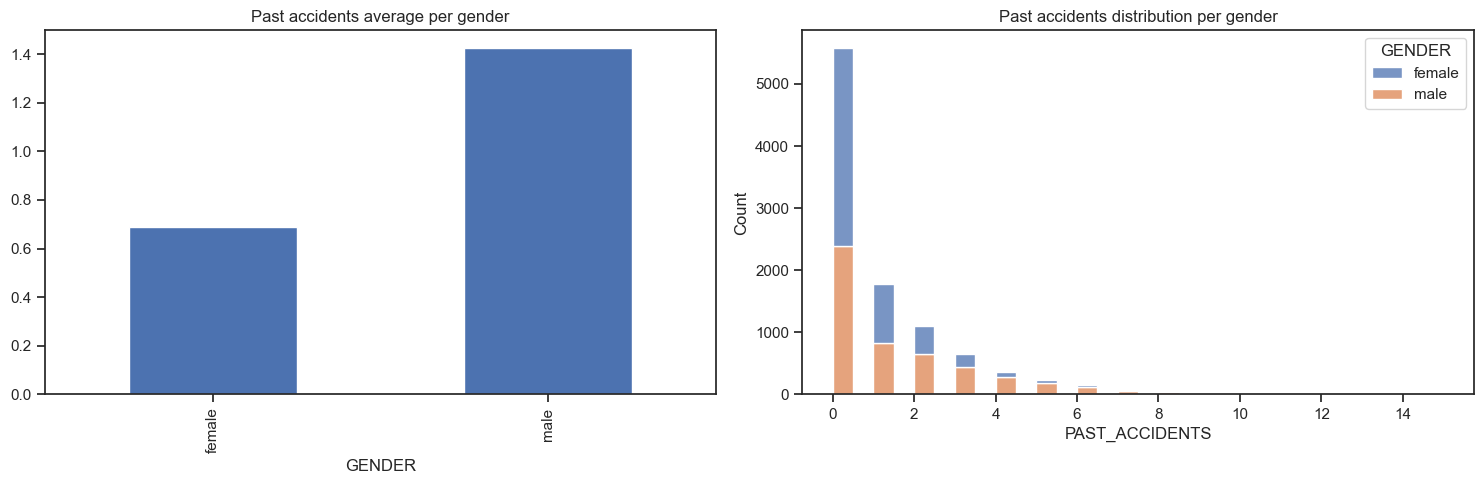

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5)) # Create a 1x2 grid of subplots

df.groupby("GENDER")["PAST_ACCIDENTS"].mean().plot(kind="bar", ax=axes[0]) # Plot the average PAST_ACCIDENTS by GENDER
axes[0].set_title('Past accidents average per gender')

sns.histplot(data=df, x="PAST_ACCIDENTS", hue="GENDER", stat="count", multiple="stack", bins=30, ax=axes[1]) # Plot the histogram of PAST_ACCIDENTS by GENDER
axes[1].set_title('Past accidents distribution per gender')

plt.tight_layout()

plt.show()

Text(0.5, 1.0, 'Past accidents average per person with(1)/without(0) children')

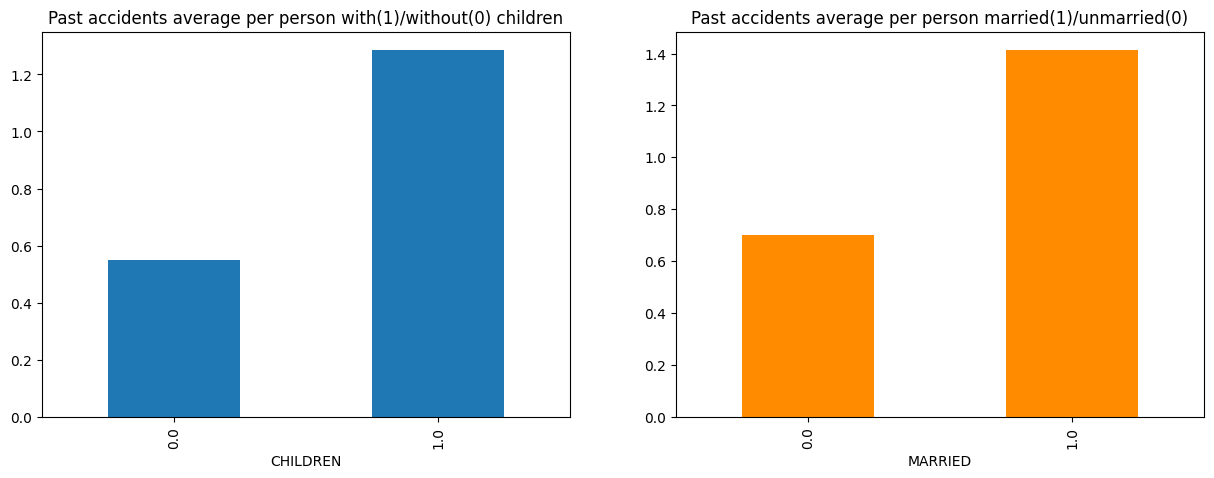

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5)) # Create a 1x2 grid of subplots

df.groupby("MARRIED")["PAST_ACCIDENTS"].mean().plot(kind="bar", ax=axes[1], color="darkorange") # Plot the average PAST_ACCIDENTS by MARRIED
axes[1].set_title('Past accidents average per person married(1)/unmarried(0)')

df.groupby("CHILDREN")["PAST_ACCIDENTS"].mean().plot(kind="bar", ax=axes[0]) # Plot the average PAST_ACCIDENTS by CHILDREN
axes[0].set_title('Past accidents average per person with(1)/without(0) children')





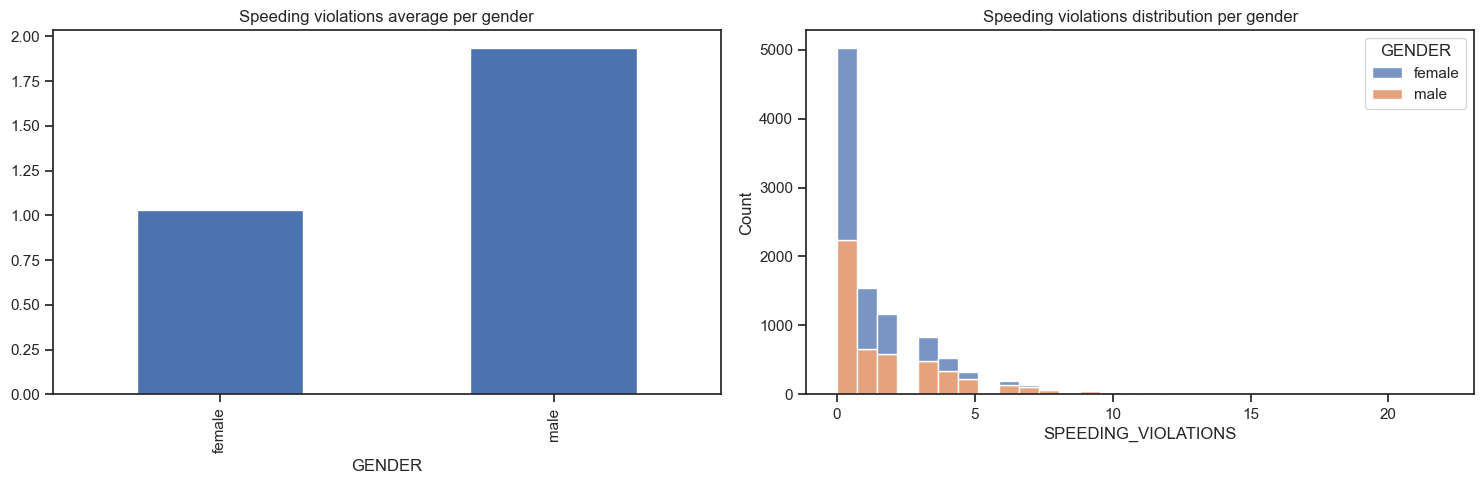

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

df.groupby("GENDER")["SPEEDING_VIOLATIONS"].mean().plot(kind="bar", ax=axes[0]) # Plot the average SPEEDING_VIOLATIONS by GENDER
axes[0].set_title('Speeding violations average per gender')

sns.histplot(data=df, x="SPEEDING_VIOLATIONS", hue="GENDER", stat="count", multiple="stack", bins=30, ax=axes[1]) # Plot the histogram of SPEEDING_VIOLATIONS by GENDER
axes[1].set_title('Speeding violations distribution per gender')

plt.tight_layout()

plt.show()

Text(0.5, 1.0, 'Speeding violations average per person with(1)/without(0) children')

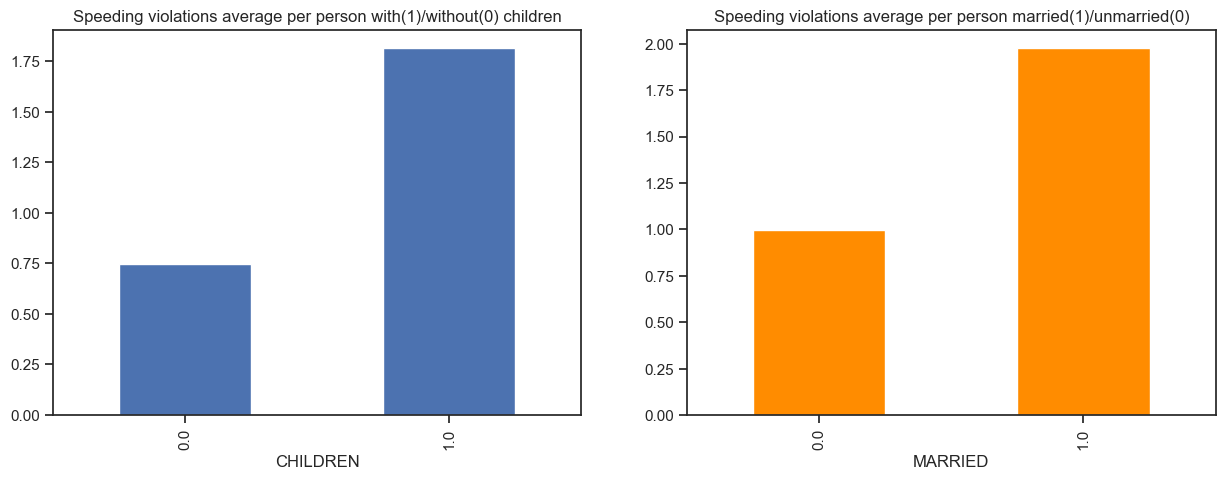

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

df.groupby("MARRIED")["SPEEDING_VIOLATIONS"].mean().plot(kind="bar", ax=axes[1], color="darkorange") # Plot the average SPEEDING_VIOLATIONS by MARRIED
axes[1].set_title('Speeding violations average per person married(1)/unmarried(0)')

df.groupby("CHILDREN")["SPEEDING_VIOLATIONS"].mean().plot(kind="bar", ax=axes[0]) # Plot the average SPEEDING_VIOLATIONS by CHILDREN
axes[0].set_title('Speeding violations average per person with(1)/without(0) children')



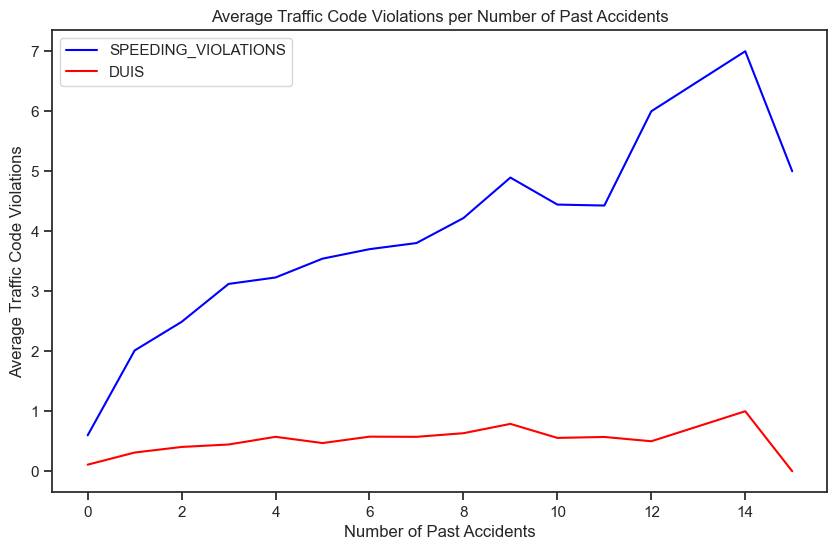

In [37]:
#Let's examine how speed violations and driving under the influence are distributed based on the number of incidents.
plt.figure(figsize=(10, 6))
df.groupby("PAST_ACCIDENTS")["SPEEDING_VIOLATIONS"].mean().plot(kind="line", color="blue") # Plot the average SPEEDING_VIOLATIONS by PAST_ACCIDENTS
df.groupby("PAST_ACCIDENTS")["DUIS"].mean().plot(kind="line", color="red") # Plot the average DUIS by PAST_ACCIDENTS
plt.legend(["SPEEDING_VIOLATIONS", "DUIS"])
plt.title("Average Traffic Code Violations per Number of Past Accidents")
plt.xlabel("Number of Past Accidents")
plt.ylabel("Average Traffic Code Violations")
plt.show()

# Feature engineering

## Missing values addressing

We opt not to employ Scikit-Learn's SimpleImputer due to its high cost, considering the presence of only two numeric variables with missing values. Furthermore, the transformation of the dataframe would entail an excessively time-consuming process.  
  
The two variables with missing values are:  
  
- Credit Score
- Annual Mileage 
 
In order to select the most suitable imputation method, it is imperative to grasp the data distribution. We will assess whether the two variables exhibit a normal distribution (in the case of normal distribution, employing the mean as the imputation method is recommended) and identify outliers (if outliers are present, the imputation method of choice will be the median).

### Normality check

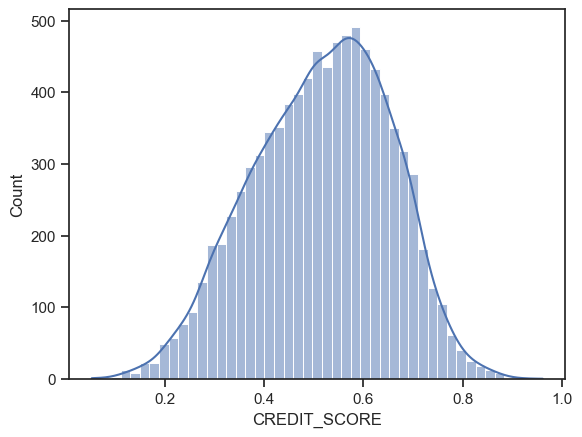

Statistiche del test: nan, Valore p: 1.0


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [38]:
# Credit Score
sns.histplot(df['CREDIT_SCORE'], kde=True) # Plot the histogram of CREDIT_SCORE
plt.show()

from scipy.stats import shapiro # Import the Shapiro-Wilk test for a statistical approach

stat, p_value = shapiro(df['CREDIT_SCORE']) # Perform the Shapiro-Wilk test
print(f"Statistiche del test: {stat}, Valore p: {p_value}")


The Shapiro test fails for two reasons:  
  
- The distribution is evidently non-normal (not our case, or at least not prominently evident from the graph).
- The sample size is too large.  
  
Let's proceed with another test:

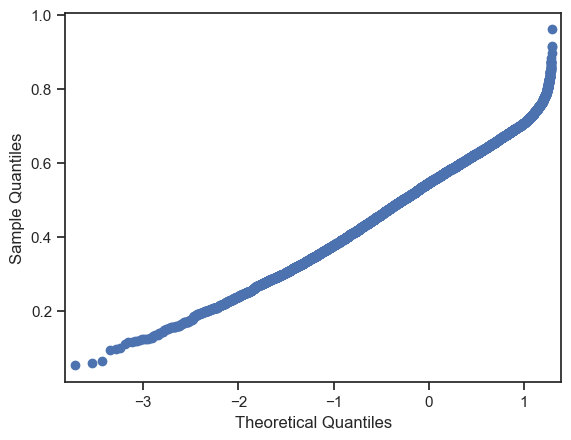

In [39]:
import statsmodels.api as sm # Import the statsmodels library

sm.qqplot(df['CREDIT_SCORE'], line='s') # Plot the quantile-quantile plot of CREDIT_SCORE
plt.show()

#In the plot, significant deviations from the expected line of normality are observed.

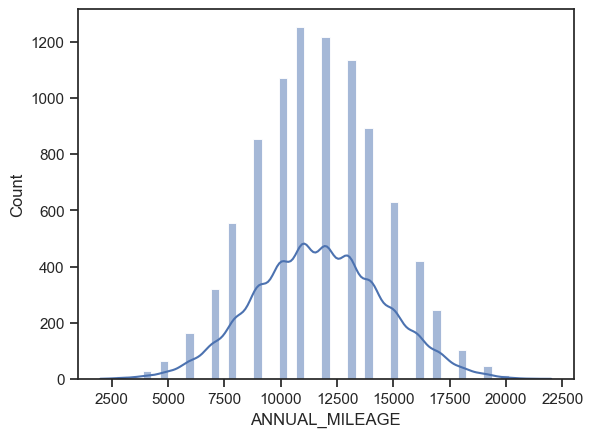

Statistiche del test: nan, Valore p: 1.0


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [40]:
# Annual Mileage
sns.histplot(df['ANNUAL_MILEAGE'], kde=True)
plt.show()

stat, p_value = shapiro(df['ANNUAL_MILEAGE'])
print(f"Statistiche del test: {stat}, Valore p: {p_value}")

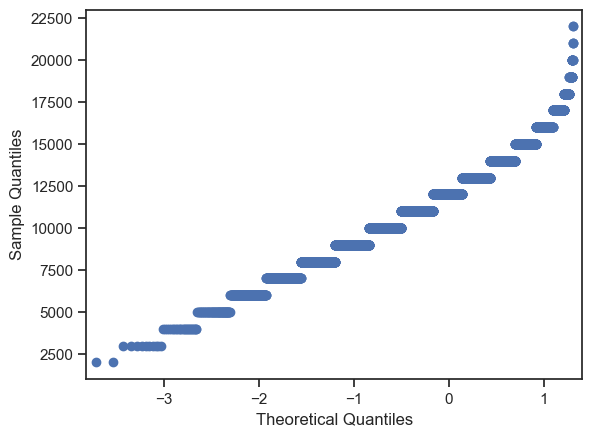

In [41]:
sm.qqplot(df['ANNUAL_MILEAGE'], line='s')
plt.show()

# In the plot, significant deviations from the expected line of normality are observed.

### Outliers check


In [42]:
from scipy import stats # Import the scipy.stats library

In [43]:
#ANNUAL MILEAGE
z_scores = stats.zscore(df['ANNUAL_MILEAGE']) # Calculate the z-scores 
outliers = (z_scores > 3) | (z_scores < -3) # Identify the outliers based on the z-scores

print(f"there are {len(df[outliers])} outliers in ANNUAL_MILEAGE\n", "\n The outliers are:\n", df[outliers])

#if it shows 0 outliers, re-run this code

there are 0 outliers in ANNUAL_MILEAGE
 
 The outliers are:
 Empty DataFrame
Columns: [ID, AGE, GENDER, RACE, DRIVING_EXPERIENCE, EDUCATION, INCOME, CREDIT_SCORE, VEHICLE_OWNERSHIP, VEHICLE_YEAR, MARRIED, CHILDREN, POSTAL_CODE, ANNUAL_MILEAGE, VEHICLE_TYPE, SPEEDING_VIOLATIONS, DUIS, PAST_ACCIDENTS, OUTCOME]
Index: []


In [75]:
#CREDIT SCORE
z_scores = stats.zscore(df['CREDIT_SCORE'])
outliers = (z_scores > 3) | (z_scores < -3)

print(f"there are {len(df[outliers])} outliers in CREDIT_SCORE\n", "\n The outliers are:\n", df[outliers])

#if it shows 0 outliers, re-run this code

there are 17 outliers in CREDIT_SCORE
 
 The outliers are:
           ID  AGE  GENDER  RACE  DRIVING_EXPERIENCE  EDUCATION  INCOME  \
2134   17273  1.0     0.0   1.0                 1.0        0.0     0.0   
2152  255200  0.0     1.0   1.0                 0.0        0.0     0.0   
3037  729287  0.0     1.0   0.0                 0.0        1.0     0.0   
3156  766245  0.0     0.0   1.0                 0.0        1.0     1.0   
3977  696638  1.0     0.0   1.0                 0.0        1.0     0.0   
4552  224416  1.0     1.0   1.0                 1.0        1.0     3.0   
4955  237974  0.0     0.0   1.0                 0.0        0.0     0.0   
6031  963384  0.0     0.0   1.0                 0.0        1.0     0.0   
6204   48520  2.0     0.0   1.0                 2.0        0.0     0.0   
6752  834276  1.0     1.0   1.0                 1.0        1.0     0.0   
7784  848214  0.0     1.0   0.0                 0.0        0.0     0.0   
7816  618914  3.0     1.0   1.0                 1.0 

Both variables do not follow a normal distribution and exhibit outliers, hence, the preference is to use the fillna method with the median.

In [78]:
df["ANNUAL_MILEAGE"].fillna(df["ANNUAL_MILEAGE"].median(), inplace=True) # Replace the missing values with the median
df["CREDIT_SCORE"].fillna(df["CREDIT_SCORE"].median(), inplace=True)
print(df.isnull().sum()) # Check for missing values being replaced

ID                     0
AGE                    0
GENDER                 0
RACE                   0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         0
VEHICLE_TYPE           0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
dtype: int64


### Categorical variables transformation

In [46]:
#recall to categorical variables
df.select_dtypes(include=['object']).columns

Index(['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'VEHICLE_YEAR', 'VEHICLE_TYPE'],
      dtype='object')

### Ordinal encoding

In [47]:
from sklearn.preprocessing import OrdinalEncoder #import the Ordinal Encoder

In [48]:
df["AGE"] = OrdinalEncoder().fit_transform(df["AGE"].values.reshape(-1, 1)) # Transformation of the AGE column in ordinal encoding, no specified order (the automatic one is the correct one)
df["DRIVING_EXPERIENCE"] = OrdinalEncoder().fit_transform(df["DRIVING_EXPERIENCE"].values.reshape(-1, 1)) # Transformation of the DRIVING EXPERIENCE column in ordinal encoding, no specified order (the automatic one is the correct one)
df["EDUCATION"] = OrdinalEncoder(categories=[['none', 'high school', 'university']]).fit_transform(df["EDUCATION"].values.reshape(-1, 1)) # Transformation of the EDUCATION column in ordinal encoding, we specified the order of the categories saying none is the first, high school is the second and university is the third
df["INCOME"] = OrdinalEncoder(categories=[['poverty', 'working class', 'middle class', 'upper class']]).fit_transform(df["INCOME"].values.reshape(-1, 1)) # Transformation of the INCOME column in ordinal encoding, we specified the order of the categories saying poverty is the first, working class is the second, middle class is the third and upper class is the fourth
df["VEHICLE_YEAR"] = OrdinalEncoder(categories=[["before 2015", "after 2015"]]).fit_transform(df["VEHICLE_YEAR"].values.reshape(-1, 1)) # Transformation of the VEHICLE YEAR column in ordinal encoding, we specified the order of the categories saying before 2015 is the first and after 2015 is the second

OrdinalEncoder().categories

'auto'

### One-Hot Encoding

In [49]:
from sklearn.preprocessing import OneHotEncoder # import the One Hot Encoder

In [50]:
df["GENDER"]=OneHotEncoder().fit_transform(df["GENDER"].values.reshape(-1, 1)).toarray() # Transformation of the GENDER column in One Hot Encoding
df["RACE"]=OneHotEncoder().fit_transform(df["RACE"].values.reshape(-1, 1)).toarray() # Transformation of the RACE column in One Hot Encoding
df["VEHICLE_TYPE"]=OneHotEncoder().fit_transform(df["VEHICLE_TYPE"].values.reshape(-1, 1)).toarray() # Transformation of the VEHICLE TYPE column in One Hot Encoding

#We didn't use get.dummies() for binary variables because we didn't want to alterate the dataframe structure. 
#At the same time, One-Hot encoding automatically encoded the categorical variables with just one binary variable

In [51]:
df.head() #Check the new structure

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,3.0,1.0,1.0,0.0,1.0,3.0,0.629027,1.0,1.0,0.0,1.0,10238,12000.0,1.0,0,0,0,0.0
1,750365,0.0,0.0,1.0,0.0,0.0,0.0,0.357757,0.0,0.0,0.0,0.0,10238,16000.0,1.0,0,0,0,1.0
2,199901,0.0,1.0,1.0,0.0,1.0,1.0,0.493146,1.0,0.0,0.0,0.0,10238,11000.0,1.0,0,0,0,0.0
3,478866,0.0,0.0,1.0,0.0,2.0,1.0,0.206013,1.0,0.0,0.0,1.0,32765,11000.0,1.0,0,0,0,0.0
4,731664,1.0,0.0,1.0,1.0,0.0,1.0,0.388366,1.0,0.0,0.0,0.0,32765,12000.0,1.0,2,0,1,1.0


# Model

### Definition of input and output variables

In [52]:
X = df.drop("OUTCOME", axis=1) # Definition of input variables
y = df["OUTCOME"] # Definition of output variable

In [53]:
X = X.drop("ID", axis=1) # Drop ID column because it doesn't provide any information

In [54]:
X.shape, y.shape # Check the shape


((10000, 17), (10000,))

In [55]:
print(f"Features (X): \n {X[:7]} \n\nLabel (y):\n {y[:7]} ") # Check the features and labels


Features (X): 
    AGE  GENDER  RACE  DRIVING_EXPERIENCE  EDUCATION  INCOME  CREDIT_SCORE  \
0  3.0     1.0   1.0                 0.0        1.0     3.0      0.629027   
1  0.0     0.0   1.0                 0.0        0.0     0.0      0.357757   
2  0.0     1.0   1.0                 0.0        1.0     1.0      0.493146   
3  0.0     0.0   1.0                 0.0        2.0     1.0      0.206013   
4  1.0     0.0   1.0                 1.0        0.0     1.0      0.388366   
5  2.0     1.0   1.0                 2.0        1.0     3.0      0.619127   
6  3.0     0.0   1.0                 3.0        1.0     3.0      0.492944   

   VEHICLE_OWNERSHIP  VEHICLE_YEAR  MARRIED  CHILDREN  POSTAL_CODE  \
0                1.0           1.0      0.0       1.0        10238   
1                0.0           0.0      0.0       0.0        10238   
2                1.0           0.0      0.0       0.0        10238   
3                1.0           0.0      0.0       1.0        32765   
4                

### Train-Test Split

In [56]:
from sklearn.model_selection import train_test_split # import the train_test_split function
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42) # 80% training and 20% test data split

In [57]:
X_train.shape,X_test.shape # Check the shape

((8000, 17), (2000, 17))

### Feature Scaling

In [58]:
from sklearn.preprocessing import StandardScaler # import the Standard Scaler
scaler = StandardScaler() # Definition of the Standard Scaler
X_train_scaled = scaler.fit_transform(X_train) # Standardize the training data
X_test_scaled = scaler.transform(X_test) # Standardize the test data

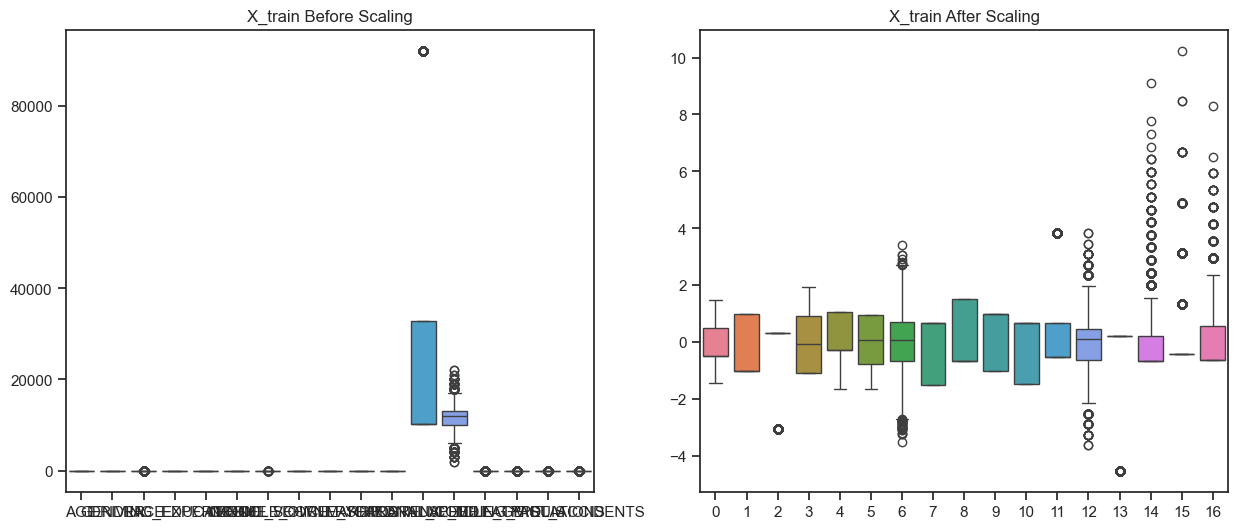

In [59]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.boxplot(X_train) # Plot the training data before scaling
plt.title("X_train Before Scaling")

plt.subplot(1, 2, 2)
sns.boxplot(X_train_scaled) # Plot the training data after scaling
plt.title("X_train After Scaling")

plt.show()

### Logistic Regression
Model training

In [60]:
from sklearn.linear_model import LogisticRegression # import the Logistic Regression

classifier = LogisticRegression(random_state=42, max_iter=10000) #Istantiate our logistic regression classifier
classifier.fit(X_train, y_train) #Fit our logistic regression classifier


LogisticRegression(max_iter=10000, random_state=42)

In [61]:
y_pred = classifier.predict(X_test) #Predict the test data

Model evaluation

In [62]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, matthews_corrcoef

conf_matrix = confusion_matrix(y_test, y_pred) #Confusion Matrix
print(f'Confusion Matrix:\n {conf_matrix} \n')

accuracy = accuracy_score(y_test, y_pred) #Accuracy
print(f'\nAccuracy: {accuracy} \n')

report = classification_report(y_test, y_pred) #Precision, recall and F1-score
print(f'\nClassification Report:\n {report}')

mcc = matthews_corrcoef(y_test, y_pred)
print(f"\nMatthew's Correlation Coefficient: {mcc}") #Matthew's Correlation Coefficient


Confusion Matrix:
 [[1238  129]
 [ 189  444]] 


Accuracy: 0.841 


Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.91      0.89      1367
         1.0       0.77      0.70      0.74       633

    accuracy                           0.84      2000
   macro avg       0.82      0.80      0.81      2000
weighted avg       0.84      0.84      0.84      2000


Matthew's Correlation Coefficient: 0.6244886508242662


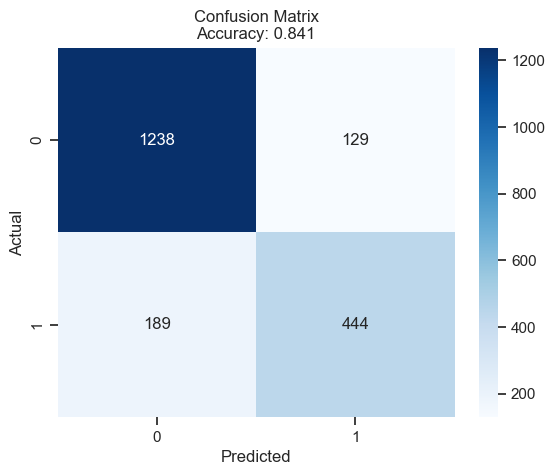

In [63]:
import seaborn as sns

sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues') #Plot the confusion matrix

plt.title(f'Confusion Matrix\nAccuracy: {accuracy:.3f}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Hyperparameter Tuning

In [64]:
param_grid = {
    "C": [0.1, 1], # C: regularization parameter
    "solver": ['liblinear', 'lbfgs', 'newton-cg', 'sag'], # solver: algorithm to use in the optimization problem (for logistic regression)
    "max_iter": [10000, 15000, 20000],# max_iter: maximum number of iterations taken for the solver to converge
}

In [65]:
from sklearn.linear_model import LogisticRegression # import the Logistic Regression
model = LogisticRegression(random_state=42, max_iter=10000) #Istantiate our logistic regression classifier

In [66]:
# Use GridSearchCV for hyperparameter tuning
from sklearn.model_selection import GridSearchCV # import the GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=2, scoring='accuracy', n_jobs=-1, refit=True, verbose=3)  # define the grid search
model_grid = grid.fit(X_train, y_train)  # actually executing the grid search

Fitting 2 folds for each of 24 candidates, totalling 48 fits


[CV 2/2] END C=0.1, max_iter=10000, solver=liblinear;, score=0.800 total time=   0.2s
[CV 1/2] END C=0.1, max_iter=10000, solver=liblinear;, score=0.805 total time=   0.1s
[CV 1/2] END C=0.1, max_iter=15000, solver=liblinear;, score=0.805 total time=   0.1s
[CV 2/2] END C=0.1, max_iter=15000, solver=liblinear;, score=0.800 total time=   0.1s
[CV 1/2] END C=0.1, max_iter=10000, solver=newton-cg;, score=0.845 total time=   1.2s
[CV 2/2] END C=0.1, max_iter=10000, solver=newton-cg;, score=0.842 total time=   1.3s
[CV 1/2] END C=0.1, max_iter=15000, solver=newton-cg;, score=0.845 total time=   1.1s
[CV 2/2] END C=0.1, max_iter=15000, solver=newton-cg;, score=0.842 total time=   1.4s
[CV 2/2] END C=0.1, max_iter=10000, solver=lbfgs;, score=0.841 total time=   8.2s
[CV 1/2] END C=0.1, max_iter=20000, solver=liblinear;, score=0.805 total time=   0.1s
[CV 2/2] END C=0.1, max_iter=20000, solver=liblinear;, score=0.800 total time=   0.1s
[CV 2/2] END C=0.1, max_iter=15000, solver=lbfgs;, score=0

In [67]:
model = model_grid.best_estimator_  # retrieve the best-performing model found during the grid search
y_pred = model.predict(X_test)  # make predictions on the test data

In [68]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [69]:
# Evaluate your model!
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.3%}".format(accuracy))

precision = precision_score(y_test, y_pred)
print("Precision: {:.3%}".format(precision))

recall = recall_score(y_test, y_pred)
print("Recall: {:.3%}".format(recall))

Accuracy: 84.100%
Precision: 77.487%
Recall: 70.142%


In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

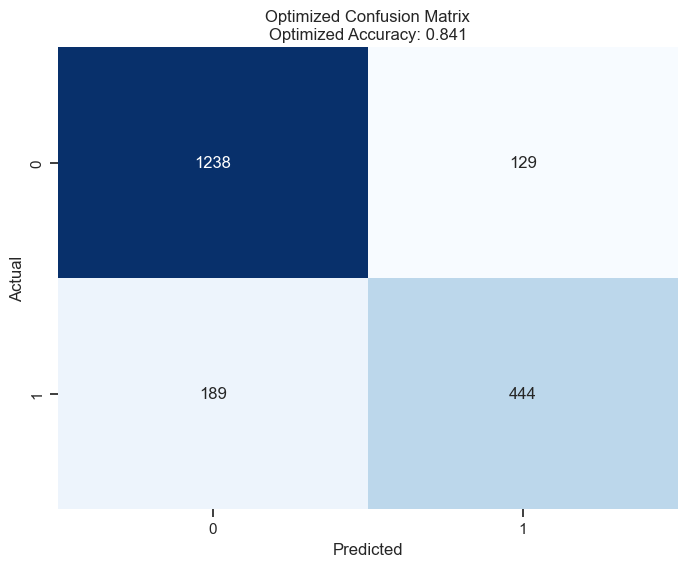

In [71]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f'Optimized Confusion Matrix\nOptimized Accuracy: {accuracy:.3f}')
plt.show()

In [72]:
from sklearn.metrics import classification_report


In [73]:
# Classification Report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.91      0.89      1367
         1.0       0.77      0.70      0.74       633

    accuracy                           0.84      2000
   macro avg       0.82      0.80      0.81      2000
weighted avg       0.84      0.84      0.84      2000



In [74]:
mcc = matthews_corrcoef(y_test, y_pred)
print(f"\nMatthew's Correlation Coefficient: {mcc}")


Matthew's Correlation Coefficient: 0.6244886508242662


The initial results and those after hyperparameter optimization demonstrate a substantial stability in the model evaluation metrics. The confusion matrix, accuracy, and precision, recall, and F1-score metrics remain almost unchanged. Despite hyperparameter optimization, the model seems to maintain similar overall performance, suggesting that the initial configuration may already be close to optimal for the given dataset. Further analysis may be required to determine if there are other avenues for improvement.